<a href="https://colab.research.google.com/github/desireesosa/EDP1/blob/main/MembranaVibratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Membrana Vibratoria** \
*Elaborar la solucion completa general de la ecuacion de onda bidimensional sobre un rectangulo en el plano cartesiano (que modela la vibración de una membrana cuadrada). Luego aplicar la solución general a la función dada en la imagen, considerar que g(x) = 0.*

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

*Definir parametros y las funciones*

In [31]:
a=4
b=2
c=1

Nx, Ny=50, 50
x=np.linspace(0,a,Nx)
y=np.linspace(0,b,Ny)
X, Y=np.meshgrid(x,y)

*Definiendo a la funcion de desplazamiento inicial (dada en la imagen del classroom):*

In [32]:
def f(x,y):
    return 0.1*(4*x-x**2)*(2*y-y**2)

In [33]:
M=10
N=10


*Calculando los coeficientes y construyendo matriz:*

In [34]:
def computo_coef(m,n):
  integrando=f(X,Y)*np.sin(m*np.pi*X/a)*np.sin(n*np.pi*Y/b)
  return (4/(a*b))*np.trapz(np.trapz(integrando,y),x)

coef=np.zeros((M,N))
for i in range(1, M+1):
  for j in range(1,N+1):
    coef[i-1,j-1]=computo_coef(i,j)

<ipython-input-34-dfc44e53ce0a>:3: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return (4/(a*b))*np.trapz(np.trapz(integrando,y),x)


*Resolviendo analiticamente:*

In [35]:
def g(x, y, t):
    resultados = np.zeros_like(x)
    for i in range(1, M + 1):
        for j in range(1, N + 1):
            omega_mn = c * np.pi * np.sqrt((i / a)**2 + (j / b)**2)
            resultados += coef[i - 1, j - 1] * np.sin(i * np.pi * x / a) * np.sin(j * np.pi * y / b) * np.cos(omega_mn * t)
    return resultados

*Visualizacion*

/usr/local/lib/python3.11/dist-packages/matplotlib/animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


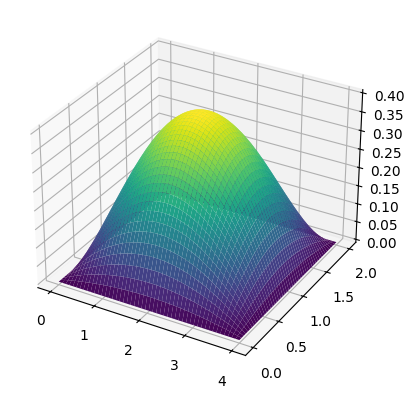

In [36]:
fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')
Z=g(X,Y,0)
surf=ax.plot_surface(X, Y, g(X, Y, 0), cmap='viridis')

def update(frame):
    ax.clear()
    Z=g(X,Y,frame)
    ax.plot_surface(X, Y, Z, cmap='viridis')
    ax.set_zlim(-1, 1)
    ax.set_tittle(f"t={frame:.2f}s")

ani=  FuncAnimation(fig, update, frames=np.linspace(0, 5, 100), interval=100)
plt.show()
